# Regression

## Linear Regression

In [1]:
# Import deps
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Input training data
X_train = np.array([
    5.86, 1.34, 3.65, 4.69, 4.13,
    5.87, 7.91, 5.57, 7.30, 7.89
    ]).reshape(-1, 1)
y_train = np.array([
    0.74, 1.18, 0.51, -0.48, -0.07,
    0.37, 1.35, 0.30, 1.64, 1.75
    ])

X_test = np.array([
    5.80, 0.57, 4.3, 6.55, 0.82,
    3.72, 5.8, 3.26, 6.75, 4.77
    ]).reshape(-1, 1)
y_test = np.array([
    0.93, 1.87, -0.06, 1.6, 1.22,
    0.9, 0.93, 1.53, 1.73, -0.51
    ])

In [3]:
# Linear Regression Model
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [4]:
# Predict
y_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)

In [5]:
from mlxtend.evaluate import bias_variance_decomp

def print_info(model, y_pred):
    print(f'x_mean: {np.mean(X_train)} y_mean: {np.mean(y_train)}')
    # The coefficients
    print(f'Coefficients: {model.coef_} Intercept: {model.intercept_}')
    # The mean squared error
    print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))
    mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=2000)
    print(f'Accuracy (bias): {bias} Precision (variance): {var} MSE: {mse}')

    print(y_pred)

print_info(regr, y_pred)

x_mean: 5.420999999999999 y_mean: 0.729
Coefficients: [0.15748272] Intercept: -0.12471381723758779
Mean squared error: 0.94
Coefficient of determination: -0.74
Accuracy (bias): 1.2228946380407324 Precision (variance): 0.3086157406989218 MSE: 1.5315103787396538
[ 0.78868595 -0.03494867  0.55246187  0.90679799  0.00442201  0.4611219
  0.78868595  0.38867985  0.93829453  0.62647875]


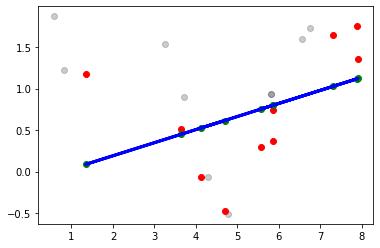

In [6]:
# Plot
plt.scatter(X_test, y_test, color='black', alpha=0.2)
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_train, y_train_pred, color='green')
plt.plot(X_train, y_train_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

## Polynomial Regression

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [8]:
degree = 5
polyregr = Pipeline([
    ('poly', PolynomialFeatures(degree)),
    ['regr', LinearRegression()]
    ])
polyregr.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ['regr', LinearRegression()]])

In [9]:
poly_train_pred = polyregr.predict(X_train)
poly_test_pred = polyregr.predict(X_test)
print(poly_train_pred)
print(poly_test_pred)
poly_regr = polyregr['regr']
print(f'Coefficients: {poly_regr.coef_} Intercept: {poly_regr.intercept_}')

[ 0.56554276  1.17983727  0.53610874 -0.38889875 -0.15047047  0.57744329
  1.54101235  0.22749204  1.65451056  1.54742221]
[ 0.49421814 -9.64496018 -0.28708333  1.3075993  -4.79096348  0.41006931
  0.49421814  1.3636086   1.45937888 -0.37567545]
Coefficients: [ 0.00000000e+00  4.11625083e+01 -1.95717092e+01  4.08273543e+00
 -3.88867809e-01  1.38766021e-02] Intercept: -27.464621631447976


In [10]:
# Sort the data to plot quad line
xp, yp = zip(*sorted(zip(X_train, poly_train_pred)))

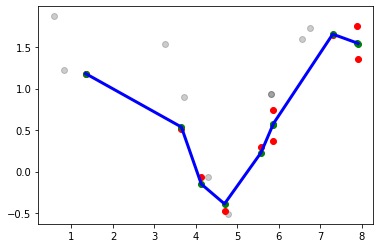

In [11]:
plt.scatter(X_test, y_test, color='black', alpha=0.2)
plt.scatter(X_train, y_train,  color='red')
plt.scatter(xp, yp,  color='green')
plt.plot(xp, yp, color='blue', linewidth=3)
plt.xticks()
plt.yticks()

plt.show()

## Regression Analytic Solution

$$\Theta = (X^TX)^{-1}X^TY$$

In [12]:
def analytic_solution(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def make_polynomial_data_mat(X, degree=1):
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    for i in range(1, degree):
        X = np.insert(X, i + 1, np.power(np.ndarray.flatten(X_train), i + 1), axis=1)
    return X

In [13]:
degrees = [1, 2, 4]

for deg in degrees:
    solution = analytic_solution(make_polynomial_data_mat(X_train, deg), y_train)
    print(f'degree {deg} params: {solution}')

degree 1 params: [-0.12471382  0.15748272]
degree 2 params: [ 2.38902063 -1.07370721  0.1252789 ]
degree 4 params: [-6.80776406 10.91680274 -4.60513795  0.73170903 -0.03884038]


## Ridge

In [14]:
from sklearn.linear_model import Ridge

## Bias-Variance Tradeoff

MSE: 0.9416 coef: [0.         0.15748272] intercept: -0.1247138172375879
Accuracy (bias): 1.3038030637394464 Precision (variance): 0.32526576321336664 MSE: 1.629068826952813
MSE: 0.5013 coef: [ 0.         -1.07370721  0.1252789 ] intercept: 2.3890206306991177
Accuracy (bias): 0.5261372359649983 Precision (variance): 1.5021124013233926 MSE: 2.0282496372883907
MSE: 1.9504 coef: [ 0.         10.91680274 -4.60513795  0.73170903 -0.03884038] intercept: -6.807764064385664
Accuracy (bias): 735.5756555066355 Precision (variance): 43697.4455846892 MSE: 44433.021240195834


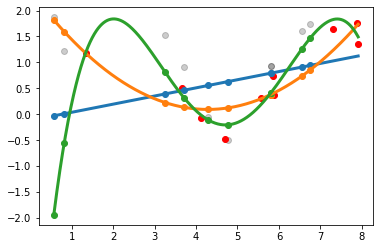

In [15]:
def bias_var_tradeoff(model):
    y_pred = model.predict(X_test)
    regr_step = model['regr']
    print(f'MSE: {mean_squared_error(y_test, y_pred):.4f} coef: {regr_step.coef_} intercept: {regr_step.intercept_}')
    points = np.linspace(0.57, 7.91, 1000).reshape(-1, 1)
    plt.scatter(X_test, y_pred)
    plt.plot(points, model.predict(points), linewidth=3)
    mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse')
    print(f'Accuracy (bias): {bias} Precision (variance): {var} MSE: {mse}')

plt.scatter(X_test, y_test, color='black', alpha=0.2)
plt.scatter(X_train, y_train,  color='red')

degrees = [1, 2, 4]

for degree in degrees:
    regr =  Pipeline([
            ('poly', PolynomialFeatures(degree)),
            ['regr', LinearRegression()]
        ])
    regr.fit(X_train, y_train)
    bias_var_tradeoff(regr)

plt.xticks()
plt.yticks()
plt.show()

## Logistic Regression

### Data

In [16]:
X_train = np.array([
    [0.959, 0.382],
    [0.750, 0.306],
    [0.395, 0.760],
    [0.823, 0.764],
    [0.761, 0.874],
    [0.844, 0.435],
    ])
y_train = np.array([
    0, 0, 0,
    1, 1, 1
    ])

X_test = np.array([
    [0.959, 0.382],
    [0.750, 0.306],
    [0.395, 0.760],
    [0.823, 0.764],
    [0.761, 0.874],
    [0.844, 0.435],
    ])
y_test = np.array([
    0, 0, 0,
    1, 1, 1
    ])

m = y_train.shape[0]

Theta_0 = np.array([1.5, 0.5, -1])

learning_rate = 0.1

"""
X_train = np.array([
    [0.959, 0.382],
    [0.750, 0.306],
    [0.395, 0.760],
    [0.823, 0.764],
    [0.761, 0.874],
    [0.844, 0.435],
    ])
"""


'\nX_train = np.array([\n    [0.959, 0.382],\n    [0.750, 0.306],\n    [0.395, 0.760],\n    [0.823, 0.764],\n    [0.761, 0.874],\n    [0.844, 0.435],\n    ])\n'

### Gradient Descent

In [17]:
def gradient_descent(obj_fn, grad_fn, Theta, learning_rate=0.4, epsilon=1e-5, iters=10000, verbose=False):
    count = 0
    Theta_prev = np.inf * np.ones_like(Theta)
    converge = lambda prev, curr: abs(prev - curr) < epsilon
    while not converge(obj_fn(Theta_prev), obj_fn(Theta)):
        Theta_prev = Theta
        Theta = Theta - learning_rate * grad_fn(Theta)
        count += 1
        if verbose:
            print(f'Iter #{count}, Theta: {Theta} obj(Theta): {obj_fn(Theta)} obj(Prev): {obj_fn(Theta_prev)}')
        
        if count >= iters:
            print(f'Failed to converge in {iters} iters')
            return Theta
    
    print(f'Converged in {count} steps')
    return Theta



### Utils

In [18]:
sigmoid = lambda z: 1.0 / (1 + np.exp(-z))

P = lambda X, Theta: np.clip(sigmoid(X @ Theta), 1e-3, 1 - 1e-3)

# Cross-entropy loss
ce_loss = lambda X, Theta, Y_true: np.sum(-Y_true * np.log(P(X, Theta)) - (1.0 - Y_true) * np.log(1 - P(X, Theta)))
d_ce_loss = lambda X, Theta, Y_true: np.sum((P(X, Theta) - Y_true) * X, axis=0, keepdims=True).T  # Output: column vector

def prob2category(prob_ls, threshold = 0.5):
    prob_ls = prob_ls.copy()
    prob_ls[prob_ls >= threshold] = 1
    prob_ls[prob_ls < threshold] = 0
    return prob_ls

### Model

In [19]:
def logistic_regression(X, y, Theta, learning_rate=0.4):
    
    obj_f = lambda Theta: ce_loss(X, Theta, y)
    d_obj_f = lambda Theta: d_ce_loss(X, Theta, y)

    # Use gradient descent to find the best model
    Theta_optim = gradient_descent(obj_f, d_obj_f, Theta, learning_rate, verbose=True)
        
    return Theta_optim

def logistic_predict(X, Theta):
    prob_ls = P(X, Theta)
    return prob2category(prob_ls)

In [20]:
X_train_with_bias = np.concatenate([X_train, np.ones((X_train.shape[0], 1))], axis=1)
Theta_optim = logistic_regression(
    X_train_with_bias,
    y_train[:, np.newaxis],
    Theta_0[:, np.newaxis],
    learning_rate
    )
Theta_optim

Iter #1, Theta: [[ 1.46366545]
 [ 0.49496566]
 [-1.06232756]] obj(Theta): 3.888896819545824 obj(Prev): 3.935072651554378
Iter #2, Theta: [[ 1.43741155]
 [ 0.49762193]
 [-1.11143072]] obj(Theta): 3.861114152406609 obj(Prev): 3.888896819545824
Iter #3, Theta: [[ 1.41861721]
 [ 0.50590347]
 [-1.15078544]] obj(Theta): 3.843149557485568 obj(Prev): 3.861114152406609
Iter #4, Theta: [[ 1.40528246]
 [ 0.51824119]
 [-1.18303396]] obj(Theta): 3.8303652656643763 obj(Prev): 3.843149557485568
Iter #5, Theta: [[ 1.3959207 ]
 [ 0.53347242]
 [-1.21013521]] obj(Theta): 3.820306757177941 obj(Prev): 3.8303652656643763
Iter #6, Theta: [[ 1.38944336]
 [ 0.55074788]
 [-1.23352098]] obj(Theta): 3.8116912469766073 obj(Prev): 3.820306757177941
Iter #7, Theta: [[ 1.38506027]
 [ 0.56945237]
 [-1.25422917]] obj(Theta): 3.803853168248494 obj(Prev): 3.8116912469766073
Iter #8, Theta: [[ 1.38220078]
 [ 0.58914249]
 [-1.27300847]] obj(Theta): 3.7964485454632433 obj(Prev): 3.803853168248494
Iter #9, Theta: [[ 1.380454

array([[ 11.01835916],
       [ 11.73771354],
       [-14.97547966]])

In [21]:
y_pred = logistic_predict(X_train_with_bias, Theta_optim)
y_pred

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]])

### Scikit-Learn Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print(f'coef: {logreg.coef_} intercept: {logreg.intercept_}')

coef: [[0.16211763 0.2954138 ]] intercept: [-0.29580869]


Scikit-Learn SDG Classifier

In [23]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(
    penalty="none",
    eta0=learning_rate,
    learning_rate="constant",
    tol=1e-5,
    shuffle=False,
    max_iter=10000,
    loss="log"
    )
sgd.fit(X_train, y_train, coef_init=np.array([1.5, 0.5]), intercept_init=-1)

y_pred_sgd = sgd.predict(X_test)

print(f'coef: {sgd.coef_} intercept: {sgd.intercept_}')

coef: [[9.15826303 9.88502878]] intercept: [-12.46914605]


### Data Visualization

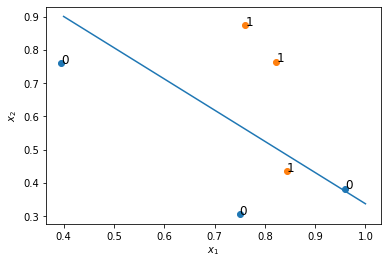

In [24]:
neg_labels_idx = y_train == 0
plt.scatter(X_train[neg_labels_idx, 0], X_train[neg_labels_idx, 1])

pos_labels_idx = y_train == 1
plt.scatter(X_train[pos_labels_idx, 0], X_train[pos_labels_idx, 1])

for i, label in enumerate(y_train):
    plt.annotate(label, X_train[i, 0:2], fontsize=12)

# Draw decision boundary
line_range = np.linspace(0.4, 1, 100)
line = lambda x1: (-Theta_optim[0] * x1 - Theta_optim[2]) / Theta_optim[1]
plt.plot(line_range, line(line_range))

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

### Plot Confusion Matrix

<AxesSubplot:>

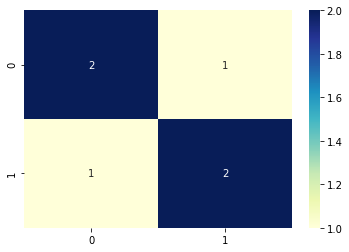

In [25]:
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='d')